In [35]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

import matplotlib.pyplot as plt

import numpy as np


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


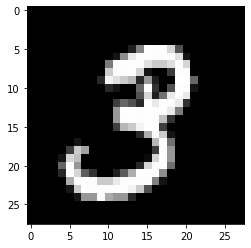

In [3]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gray')

In [4]:
tf.compat.v1.disable_eager_execution()


In [106]:
x = tf.compat.v1.placeholder(tf.float32, [None,784])
y_ = tf.compat.v1.placeholder(tf.float32, [None,10])

nn = [784, 200, 10] 

#capa1
W0= tf.Variable(tf.random_normal([nn[0],nn[1]], stddev=0.01))
B0= tf.Variable(tf.random_normal([nn[1]], stddev=0.01))

y0=tf.nn.tanh(tf.matmul(x,W0)+B0)


#capa2
W1= tf.Variable(tf.random_normal([nn[1],nn[2]], stddev=0.01))
B1= tf.Variable(tf.random_normal([nn[2]], stddev=0.01))

y=tf.nn.tanh(tf.matmul(y0,W1)+B1)



mse = tf.reduce_mean(tf.square(y_ - y))

train_step= tf.train.AdamOptimizer(0.005).minimize(mse)

init = tf.initialize_all_variables()
sess= tf.Session()
sess.run(init)




In [107]:
trainloss=[]
testloss=[]

for i in range(1000):
    batchX, batchY = mnist.train.next_batch(500)
    sess.run(train_step, feed_dict={x: batchX , y_: batchY})
    
    loss1=sess.run(mse, feed_dict={x: batchX , y_: batchY})
    loss2=sess.run(mse, feed_dict={x: mnist.test.images , y_: mnist.test.labels})
    
    trainloss.append(loss1)
    testloss.append(loss2)
print("entrenado")

entrenado


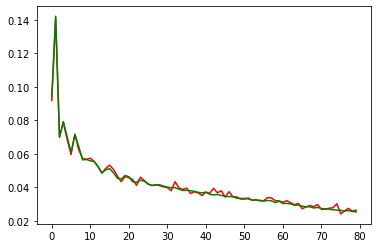

In [104]:
plt.plot(trainloss, 'r')
plt.plot(testloss, 'g')

In [105]:
pred= sess.run(y, feed_dict={x: mnist.test.images , y_: mnist.test.labels})

errors = 0.
for i in range(pred.shape[0]):
    if(np.argmax(pred[i])!= np.argmax(mnist.test.labels[i])):
        errors=errors+1
print("Test error:"+ str(errors/pred.shape[0]))

Test error:0.0929
